In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
url='https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'
df = pd.read_csv(url, skiprows=[0])
print(df.shape)
df.head()

(143, 19)


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-.09,-.14,-.23,-.21,-.17,-.17,***,***,-0.12,-.16,-.19
1,1881,-0.19,-0.14,0.04,0.05,0.07,-0.18,0.01,-.03,-.15,-.22,-.18,-.07,-.08,-.09,-.17,0.05,-.07,-.18
2,1882,0.16,0.14,0.05,-0.16,-0.13,-0.22,-0.16,-.07,-.14,-.23,-.17,-.36,-.11,-.08,.08,-0.08,-.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.19,-0.18,-0.07,-0.07,-.14,-.22,-.11,-.24,-.11,-.18,-.20,-.34,-0.16,-.09,-.19
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-.28,-.27,-.25,-.33,-.31,-.28,-.27,-.11,-0.37,-.31,-.28


In [56]:
# df.replace("***",np.nan).astype(float)
columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']
for column in columns:
    df[column]=df[column].replace('***',np.nan).astype('float')
df.dropna(inplace=True)
df['Year'].nunique()

141

# **Visualisation des données**

Un mois aléatoire

Aug


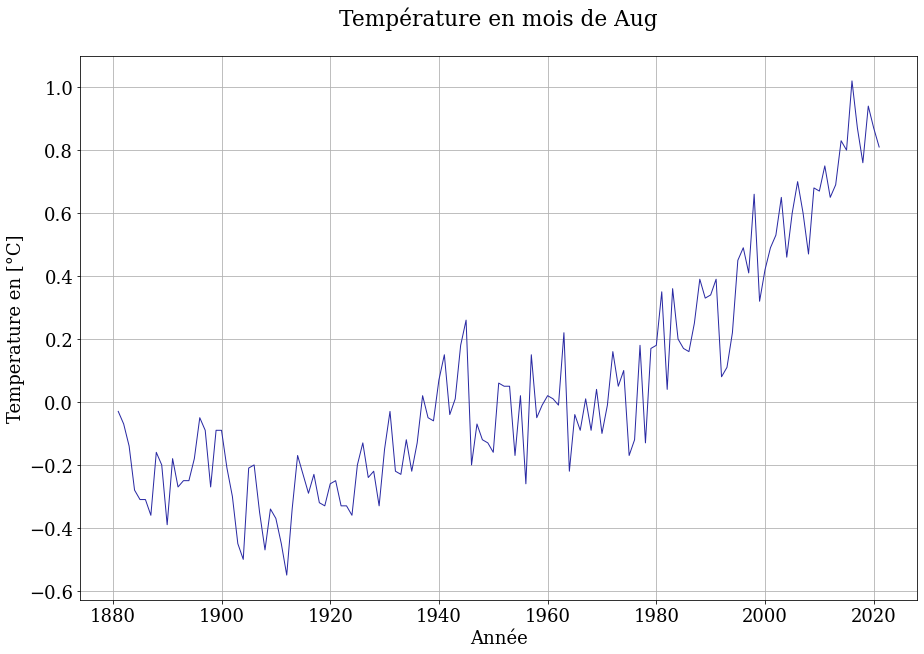

In [57]:
cols=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']
mois= np.random.choice(cols[:11])
print(mois)
fig=plt.figure(figsize=(15,10))
plt.rc('font', family='serif', size='18')

plt.plot(df['Year'],df[mois],color='#2929a3', linestyle='-', linewidth=1)
plt.title(f'Température en mois de {mois}\n')
plt.xlabel('Année')
plt.ylabel('Temperature en [°C]')
plt.grid();
plt.show()

Visualisation de DJF, MAM,JJA et SON

<Figure size 1800x1440 with 0 Axes>

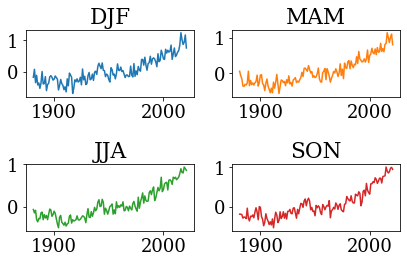

In [58]:

fig=plt.figure(figsize=(25,20))
plt.rc('font', family='serif', size='18')
fig,axis=plt.subplots(2,2)
axis[0, 0].plot(df['Year'], df['DJF'])
axis[0, 0].set_title('DJF')
axis[0, 1].plot(df['Year'], df['MAM'], 'tab:orange')
axis[0, 1].set_title('MAM')
axis[1, 0].plot(df['Year'], df['JJA'], 'tab:green')
axis[1, 0].set_title('JJA')
axis[1, 1].plot(df['Year'], df['SON'], 'tab:red')
axis[1, 1].set_title('SON')

fig.tight_layout()
plt.show()

Visualisation de J-D

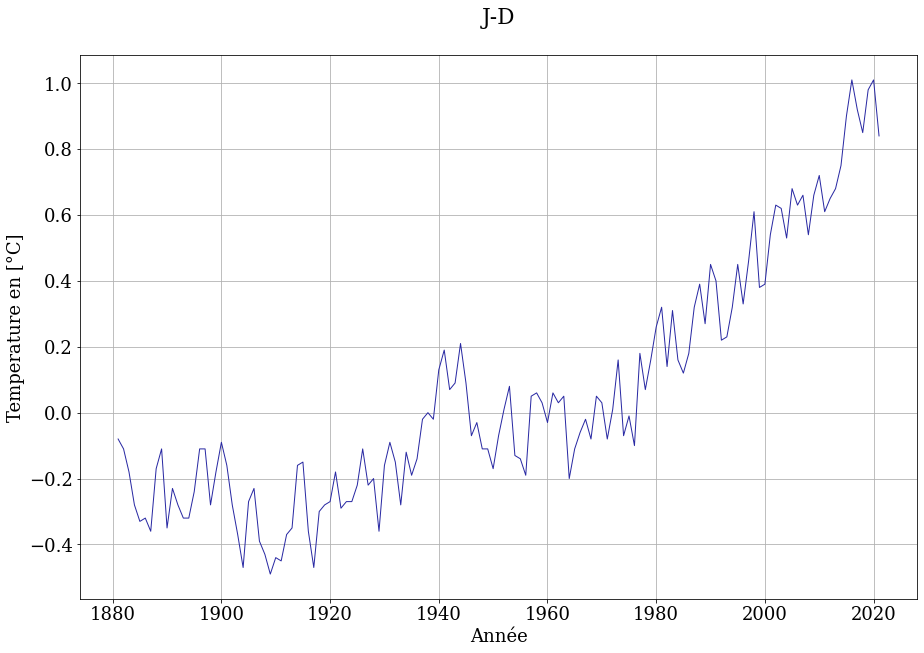

In [59]:
fig=plt.figure(figsize=(15,10))
plt.rc('font', family='serif', size='18')

plt.plot(df['Year'],df['J-D'],color='#2929a3', linestyle='-', linewidth=1)
plt.title(f'J-D\n')
plt.xlabel('Année')
plt.ylabel('Temperature en [°C]')
plt.grid();
plt.show() 

# **Régression**

Régression linéaire avec résultats théoriques :

In [60]:
def reg_th(X,t):
  """fonction generique qui prend X et t dans Rn et retourne beta1 et beta2 et sigma2 comme definies theoriquement 
  """
  n=len(X)
  Xm,tm=np.mean(X),np.mean(t)
  beta1,beta2=0,0
  for i in range(n):
    beta2 += X[i]*(t[i]-tm)
  beta2 /= sum([(t[i]-tm)**2 for i in range(n)])
  beta1= Xm-beta2*tm

  sigma2= sum([(X[i]-beta1-beta2*t[i])**2 for i in range(n)])/(n-2)

  return (beta1,beta2,sigma2)




[Initiative personnelle]Test sur une base de données (trouvée sur internet) de population/profit d'une chaine de camions de street food

In [63]:
test='https://raw.githubusercontent.com/ybenzaki/univariate_linear_regression_python/master/univariate_linear_regression_dataset.csv'
df_test= pd.read_csv(test)
df_test.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


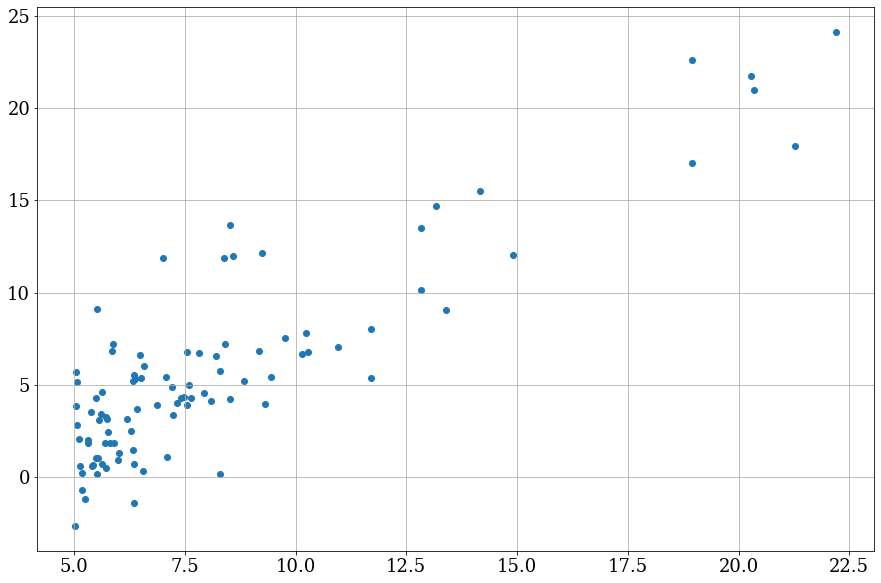

In [64]:

t = df_test.iloc[0:len(df_test),0]
X = df_test.iloc[0:len(df_test),1] 
fig=plt.figure(figsize=(15,10))
plt.rc('font', family='serif', size='18')
axes = plt.axes()
axes.grid()
plt.scatter(t,X) 
plt.show()

7.0663800575142215


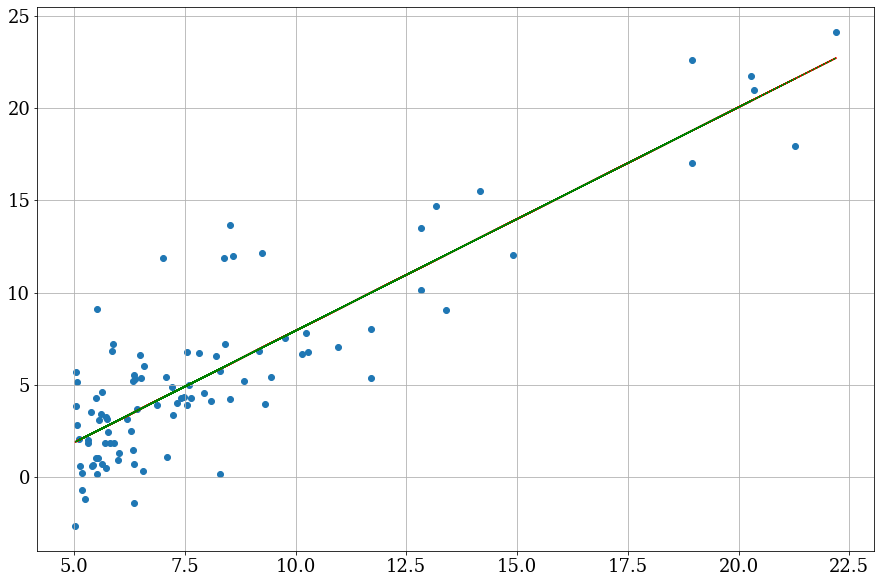

In [65]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(t, X)

(b1,b2,s2)=reg_th(X,t)
print(s2)
p=lambda x : b1+b2*x
p_stats=lambda x : intercept+slope*x
fitted=p(t)
fitted_stats=p(t)

fig=plt.figure(figsize=(15,10))
plt.rc('font', family='serif', size='18')
axes = plt.axes()
axes.grid()
plt.scatter(t,X)
plt.plot(t,fitted,'r')
plt.plot(t,fitted_stats,'g', linestyle='dotted')

plt.show()

Les deux droites \: rouge pour celle trouvée theoriquement et verte pour celle du module stats de scipy , coincident presque parfaitement.

Estimation de β1 et β2 et σ^2  avec les donnees d’anomalies sur des intervalles de temps de 30 ans

In [66]:
def chunks(lst, n):
    return [lst[x:x+n] for x in range(0, len(lst), n)]



In [67]:
list(chunks(range(100,280),30))

[range(100, 130),
 range(130, 160),
 range(160, 190),
 range(190, 220),
 range(220, 250),
 range(250, 280)]

on effctue la regression sur 'J-D'

In [68]:
t = df.iloc[0:len(df),0]
years=chunks(t,30)
X = df.iloc[0:len(df),13]
jd=chunks(X,30)
  

In [69]:
results = []
for i in range(len(jd)):
  r=reg_th(list(jd[i]),list(years[i]))
  results.append(r)

results

[(11.752186874304778, -0.0063403781979977725, 0.011277486095661838),
 (-22.44280237300705, 0.011546162402669636, 0.008355848297049656),
 (6.024340378197999, -0.003087875417130145, 0.010631790878754184),
 (-32.792548757879125, 0.016634037819799777, 0.010145470099051925),
 (-42.20234632034633, 0.021350649350649356, 0.007362661198450646)]

tracé des resultats

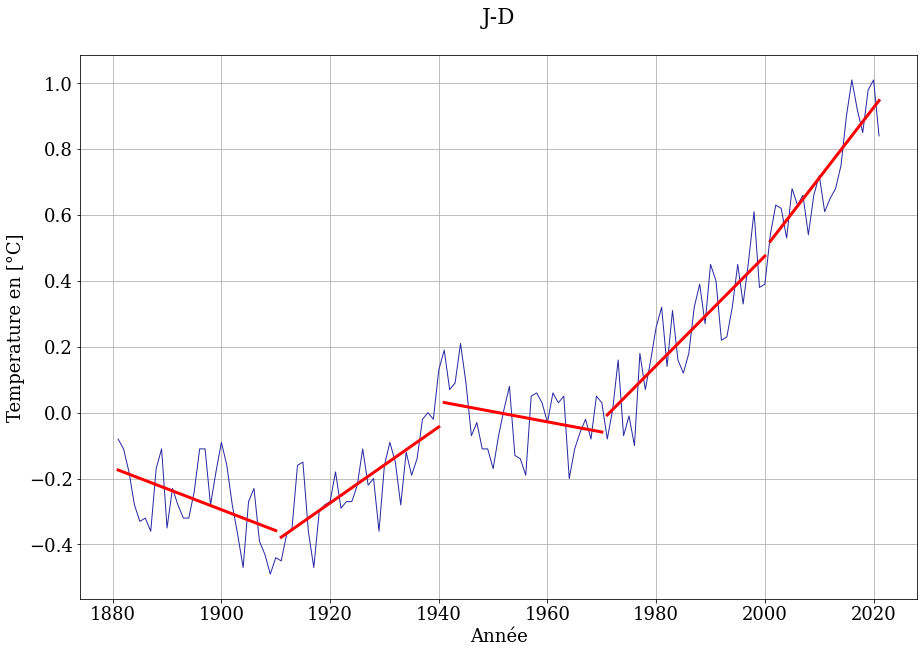

In [70]:

fit=[]
for i in range(len(years)):
  b1,b2,s2=results[i]
  def h(x):
    return b1+b2*x
  fit.append([h(x) for x in list(years[i])] )
  


fig=plt.figure(figsize=(15,10))
plt.rc('font', family='serif', size='18')

plt.plot(df['Year'],df['J-D'],color='#2929a3', linestyle='-', linewidth=1)
for i in range(5):
  plt.plot(years[i],fit[i],'r',linewidth=3)
plt.title(f'J-D\n')
plt.xlabel('Année')
plt.ylabel('Temperature en [°C]')
plt.grid();
plt.show() 

on effctue la regression sur 'JJA'

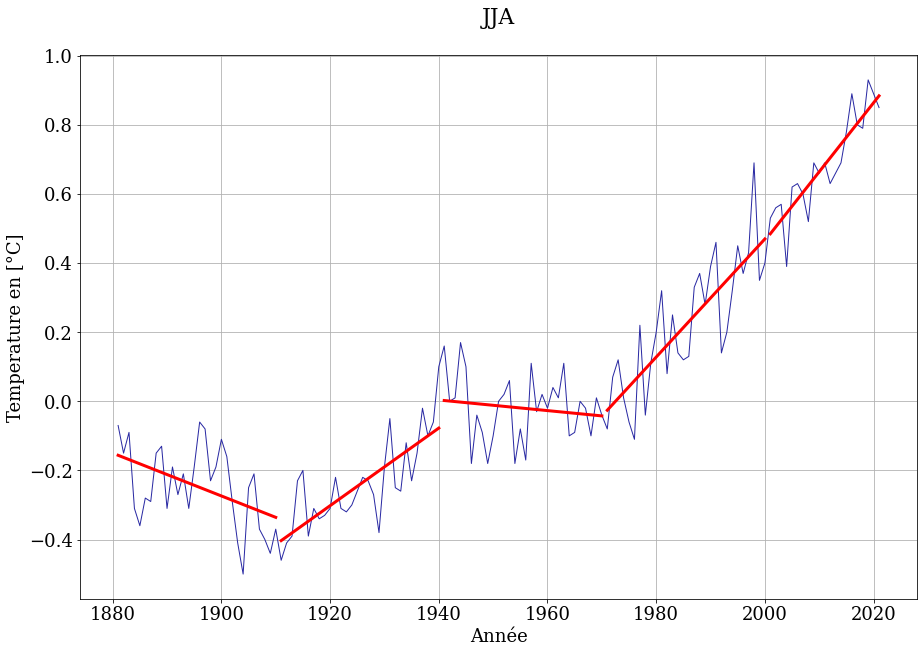

In [71]:
t = df.iloc[0:len(df),0]
years=chunks(t,30)
X = df.iloc[0:len(df),17]
jd=chunks(X,30)
results = []
for i in range(len(jd)):
  r=reg_th(list(jd[i]),list(years[i]))
  results.append(r)

fit=[]
for i in range(len(years)):
  b1,b2,s2=results[i]
  def h(x):
    return b1+b2*x
  fit.append([h(x) for x in list(years[i])] )
  


fig=plt.figure(figsize=(15,10))
plt.rc('font', family='serif', size='18')

plt.plot(df['Year'],df['JJA'],color='#2929a3', linestyle='-', linewidth=1)
for i in range(5):
  plt.plot(years[i],fit[i],'r',linewidth=3)
plt.title(f'JJA\n')
plt.xlabel('Année')
plt.ylabel('Temperature en [°C]')
plt.grid();
plt.show() 

on effctue la regression sur 'MAM'

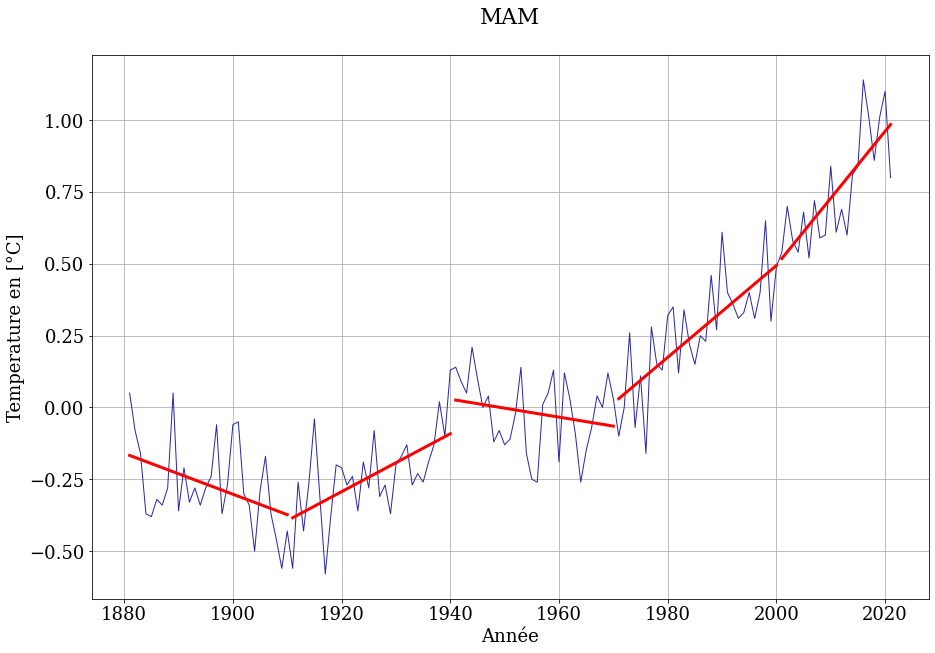

In [72]:
t = df.iloc[0:len(df),0]
years=chunks(t,30)
X = df.iloc[0:len(df),16]
jd=chunks(X,30)
results = []
for i in range(len(jd)):
  r=reg_th(list(jd[i]),list(years[i]))
  results.append(r)

fit=[]
for i in range(len(years)):
  b1,b2,s2=results[i]
  def h(x):
    return b1+b2*x
  fit.append([h(x) for x in list(years[i])] )
  


fig=plt.figure(figsize=(15,10))
plt.rc('font', family='serif', size='18')

plt.plot(df['Year'],df['MAM'],color='#2929a3', linestyle='-', linewidth=1)
for i in range(5):
  plt.plot(years[i],fit[i],'r',linewidth=3)
plt.title(f'MAM\n')
plt.xlabel('Année')
plt.ylabel('Temperature en [°C]')
plt.grid();
plt.show()

# Intervalles de confiance , P-values

In [73]:
from scipy.stats import linregress,t



tt = df.iloc[0:len(df),0]
years=chunks(tt,30)
tinv = lambda p, df: abs(t.ppf(p/2, df))

def IC_pvalues(data):
  """ donne les 95% confidence interval on slope and intercept et p values sur les intervalles a 30 ans de data
      data = {'jan'...'jja'..'Son'}
  """
  P=[]
  IC=[]
  X = df[data]
  d=chunks(X,30)
  for i in range(len(d)):
    res = linregress(list(years[i]), list(d[i]))
    ts = tinv(0.05, len(list(years[i]))-2)
    s=f"{res.slope:.6f} +/- {ts*res.stderr:.6f}"
    i=f"{res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}"
    p=f"{res.pvalue}"
    P.append([s,i,p])
  return P


IC_pvalues('MAM')


[['-0.007110 +/- 0.006120', '13.207237 +/- 11.601094', '0.02437720520012336'],
 ['0.010085 +/- 0.005289',
  '-19.655445 +/- 10.184456',
  '0.0005410024406306005'],
 ['-0.003126 +/- 0.005591', '6.092630 +/- 10.932384', '0.261790000861859'],
 ['0.015984 +/- 0.005540',
  '-31.474747 +/- 10.999681',
  '2.3304077628942052e-06'],
 ['0.023312 +/- 0.009443',
  '-46.128377 +/- 18.990545',
  '5.484475380759398e-05']]

In [76]:

columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']

def final_data(data):
  """ return un dataframe de 'data' contenant les IC et Pval pour les intervalles a 30 ans
  """
  d=[]
  P=IC_pvalues(data)
  for j in range(len(years)):
    s,i,p=P[j]
    dd=(list(years[j])[0],list(years[j])[-1])
    d.append([dd,s,i,p])
  df = pd.DataFrame(d, columns=['Years', 'slope','intercept','p_value'])
  df=df.style.set_caption(f'IC et p_values pour le champs {data}')
  return df


final_data('DJF')


,Years,slope,intercept,p_value
0,"(1881, 1910)",-0.006018 +/- 0.007041,11.108402 +/- 13.345492,0.09092328691644586
1,"(1911, 1940)",0.011880 +/- 0.007368,-23.097350 +/- 14.187286,0.0026219181910626115
2,"(1941, 1970)",-0.004707 +/- 0.006618,9.197424 +/- 12.941687,0.15622786259468913
3,"(1971, 2000)",0.018892 +/- 0.006362,-37.254936 +/- 12.631400,1.4641688094169547e-06
4,"(2001, 2021)",0.022896 +/- 0.013512,-45.316446 +/- 27.172666,0.00215460691608204
